In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import joblib
import os

In [3]:
def generate_synthetic_data(n_samples=2000, random_state=42):
    """
    Sinh dữ liệu giả lập mô phỏng khách hàng
    """

    print("=" * 70)
    print("📊 Bước 1: Sinh dữ liệu giả lập khách hàng")
    print("=" * 70)


    np.random.seed(random_state)

    # Tạo customer IDs
    customer_ids = [f"CUST_{i:05d}" for i in range(1, n_samples + 1)]


    # Demographic features
    ages = np.random.normal(40, 15, n_samples).clip(18, 80).astype(int)
    genders = np.random.choice(['Male', 'Female', 'Other'], n_samples, p=[0.48, 0.50, 0.02])
    cities = np.random.choice(['Hanoi', 'HCMC', 'Danang', 'Can Tho', 'Hai Phong'], 
                              n_samples, p=[0.3, 0.35, 0.15, 0.1, 0.1])
    education = np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 
                                 n_samples, p=[0.2, 0.5, 0.25, 0.05])
    

    # Behavioral features
    purchase_frequency = np.random.gamma(2, 3, n_samples).clip(1, 50).astype(int)
    total_spent = np.random.lognormal(8, 1.5, n_samples).clip(100, 100000)
    avg_order_value = total_spent / purchase_frequency
    days_since_last_purchase = np.random.exponential(30, n_samples).clip(0, 365).astype(int)


    # Engagement features
    website_visits = np.random.poisson(15, n_samples)
    email_open_rate = np.random.beta(5, 2, n_samples)
    social_media_engagement = np.random.gamma(3, 2, n_samples).clip(0, 100)


    # Product preferences
    preferred_category = np.random.choice(['Electronics', 'Fashion', 'Home', 'Beauty', 'Sports'], 
                                          n_samples, p=[0.25, 0.30, 0.20, 0.15, 0.10])
    num_product_categories = np.random.randint(1, 6, n_samples)


    # Customer value indicators
    customer_lifetime_months = np.random.randint(1, 60, n_samples)
    refund_rate = np.random.beta(1, 10, n_samples)
    review_score = np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.05, 0.1, 0.15, 0.35, 0.35])
    

    # Tạo DataFrame
    data = pd.DataFrame({
        'customer_id': customer_ids,
        'age': ages,
        'gender': genders,
        'city': cities,
        'education': education,
        'purchase_frequency': purchase_frequency,
        'total_spent': total_spent,
        'avg_order_value': avg_order_value,
        'days_since_last_purchase': days_since_last_purchase,
        'website_visits': website_visits,
        'email_open_rate': email_open_rate,
        'social_media_engagement': social_media_engagement,
        'preferred_category': preferred_category,
        'num_product_categories': num_product_categories,
        'customer_lifetime_months': customer_lifetime_months,
        'refund_rate': refund_rate,
        'review_score': review_score
    })
    
    print(f"✅ Đã sinh {n_samples} mẫu khách hàng")
    print(f"📋 Số features: {data.shape[1]}")
    print("\n🔍 Thông tin dữ liệu:")
    print(data.info())
    print("\n📊 Thống kê mô tả:")
    print(data.describe())

    return data



data = generate_synthetic_data(n_samples=2000)

📊 Bước 1: Sinh dữ liệu giả lập khách hàng
✅ Đã sinh 2000 mẫu khách hàng
📋 Số features: 17

🔍 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               2000 non-null   object 
 1   age                       2000 non-null   int64  
 2   gender                    2000 non-null   object 
 3   city                      2000 non-null   object 
 4   education                 2000 non-null   object 
 5   purchase_frequency        2000 non-null   int64  
 6   total_spent               2000 non-null   float64
 7   avg_order_value           2000 non-null   float64
 8   days_since_last_purchase  2000 non-null   int64  
 9   website_visits            2000 non-null   int64  
 10  email_open_rate           2000 non-null   float64
 11  social_media_engagement   2000 non-null   float64
 12  prefer


📈 Bước 2: Khám phá và Visualization dữ liệu
✅ Đã lưu: 01_feature_distributions.png
✅ Đã lưu: 02_categorical_distributions.png


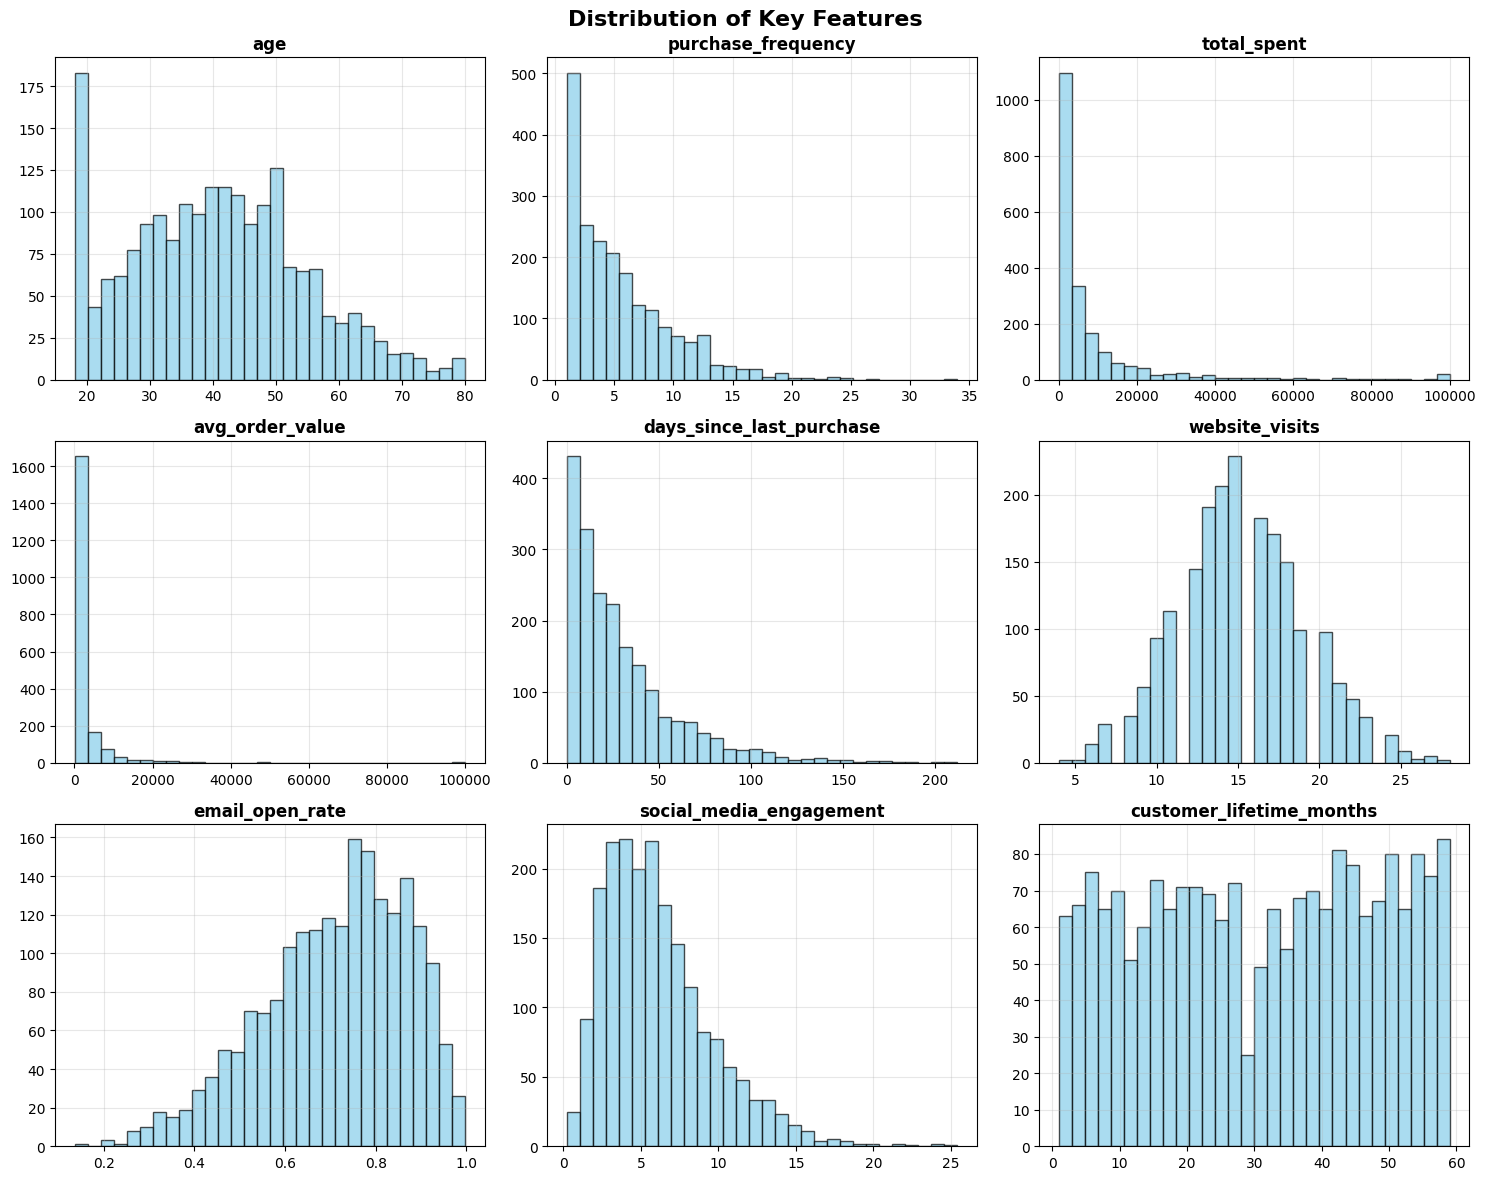

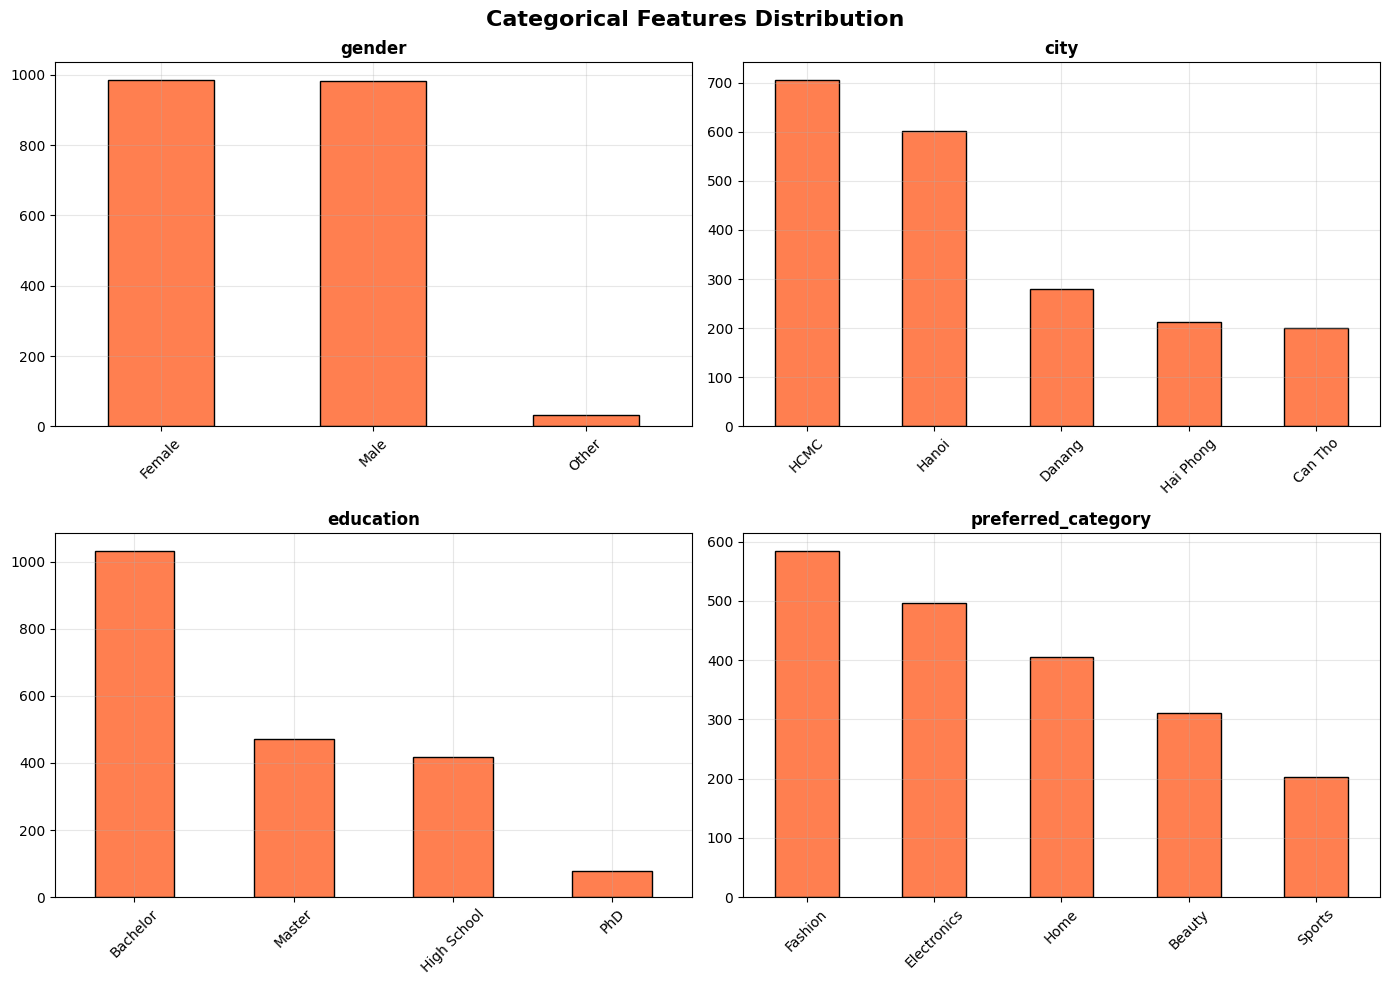

In [ ]:
def visualize_raw_data(data):
    """
    Visualization sơ bộ để hiểu dữ liệu
    """

    print("\n" + "=" * 70)
    print("📈 Bước 2: Khám phá và Visualization dữ liệu")
    print("=" * 70)


    # Distribution plots
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    fig.suptitle('Distribution of Key Features', fontsize=16, fontweight='bold')

    numeric_cols = ['age', 'purchase_frequency', 'total_spent', 'avg_order_value',
                    'days_since_last_purchase', 'website_visits', 'email_open_rate',
                    'social_media_engagement', 'customer_lifetime_months']
    
    for idx, col in enumerate(numeric_cols):
        ax = axes[idx // 3, idx % 3]
        data[col].hist(bins=30, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
        ax.set_title(col, fontweight='bold')
        ax.set_xlabel('')
        ax.grid(True, alpha=0.3)


    plt.tight_layout()
    plt.savefig('01_feature_distributions.png', dpi=300, bbox_inches='tight')
    print("✅ Đã lưu: 01_feature_distributions.png")

    # Categorical features
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Categorical Features Distribution', fontsize=16, fontweight='bold')

    cat_cols = ['gender', 'city', 'education', 'preferred_category']
    for idx, col in enumerate(cat_cols):
        ax = axes[idx // 2, idx % 2]
        data[col].value_counts().plot(kind='bar', ax=ax, color='coral', edgecolor='black')
        ax.set_title(col, fontweight='bold')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)


    plt.tight_layout()
    plt.savefig('02_categorical_distributions.png', dpi=300, bbox_inches='tight')
    print("✅ Đã lưu: 02_categorical_distributions.png")
    plt.show()


visualize_raw_data(data)

In [5]:
def preprocess_data(data):
    """
    Làm sạch và chuẩn bị dữ liệu
    """
    print("\n" + "=" * 70)
    print("🔧 Bước 3: Tiền xử lý và Feature Engineering")
    print("=" * 70)

    df = data.copy()

    # Handle missing values (nếu có)
    print("🔍 Kiểm tra missing values:")
    print(df.isnull().sum())

    # Feature Engineering
    print("\n⚙️ Tạo các features mới...")


    # 1. RFM Score components
    df['recency_score'] = pd.cut(df['days_since_last_purchase'], 
                                  bins=5, labels=[5, 4, 3, 2, 1]).astype(int)
    df['frequency_score'] = pd.cut(df['purchase_frequency'], 
                                    bins=5, labels=[1, 2, 3, 4, 5]).astype(int)
    df['monetary_score'] = pd.cut(df['total_spent'], 
                                   bins=5, labels=[1, 2, 3, 4, 5]).astype(int)
    df['rfm_score'] = df['recency_score'] + df['frequency_score'] + df['monetary_score']


    # 2. Customer Value Score
    df['clv_estimate'] = (df['avg_order_value'] * df['purchase_frequency'] * 
                          df['customer_lifetime_months'] / 12)
    

    # 3. Engagement Score
    df['engagement_score'] = (df['website_visits'] * 0.3 + 
                              df['email_open_rate'] * 100 * 0.4 + 
                              df['social_media_engagement'] * 0.3)
    

    # 4. Loyalty Indicator
    df['loyalty_score'] = (df['customer_lifetime_months'] / df['customer_lifetime_months'].max() * 50 +
                           (1 - df['refund_rate']) * 25 +
                           df['review_score'] / 5 * 25)
    

    # 5. Purchase patterns
    df['avg_days_between_purchases'] = df['customer_lifetime_months'] * 30 / df['purchase_frequency']
    df['spending_rate'] = df['total_spent'] / df['customer_lifetime_months']


    # 6. Customer segment indicators
    df['is_active'] = (df['days_since_last_purchase'] <= 30).astype(int)
    df['is_high_spender'] = (df['total_spent'] > df['total_spent'].quantile(0.75)).astype(int)
    df['is_frequent_buyer'] = (df['purchase_frequency'] > df['purchase_frequency'].quantile(0.75)).astype(int)

    print(f"✅ Đã tạo {len(df.columns) - len(data.columns)} features mới")
    print(f"📊 Tổng số features: {len(df.columns)}")
    
    return df


data_processed = preprocess_data(data)


🔧 Bước 3: Tiền xử lý và Feature Engineering
🔍 Kiểm tra missing values:
customer_id                 0
age                         0
gender                      0
city                        0
education                   0
purchase_frequency          0
total_spent                 0
avg_order_value             0
days_since_last_purchase    0
website_visits              0
email_open_rate             0
social_media_engagement     0
preferred_category          0
num_product_categories      0
customer_lifetime_months    0
refund_rate                 0
review_score                0
dtype: int64

⚙️ Tạo các features mới...
✅ Đã tạo 12 features mới
📊 Tổng số features: 29



🔄 Bước 4: Encoding và Scaling
🏷️ Encoding categorical features...
📏 Scaling numeric features...

📊 Tạo correlation heatmap...
✅ Đã lưu: 03_correlation_heatmap.png


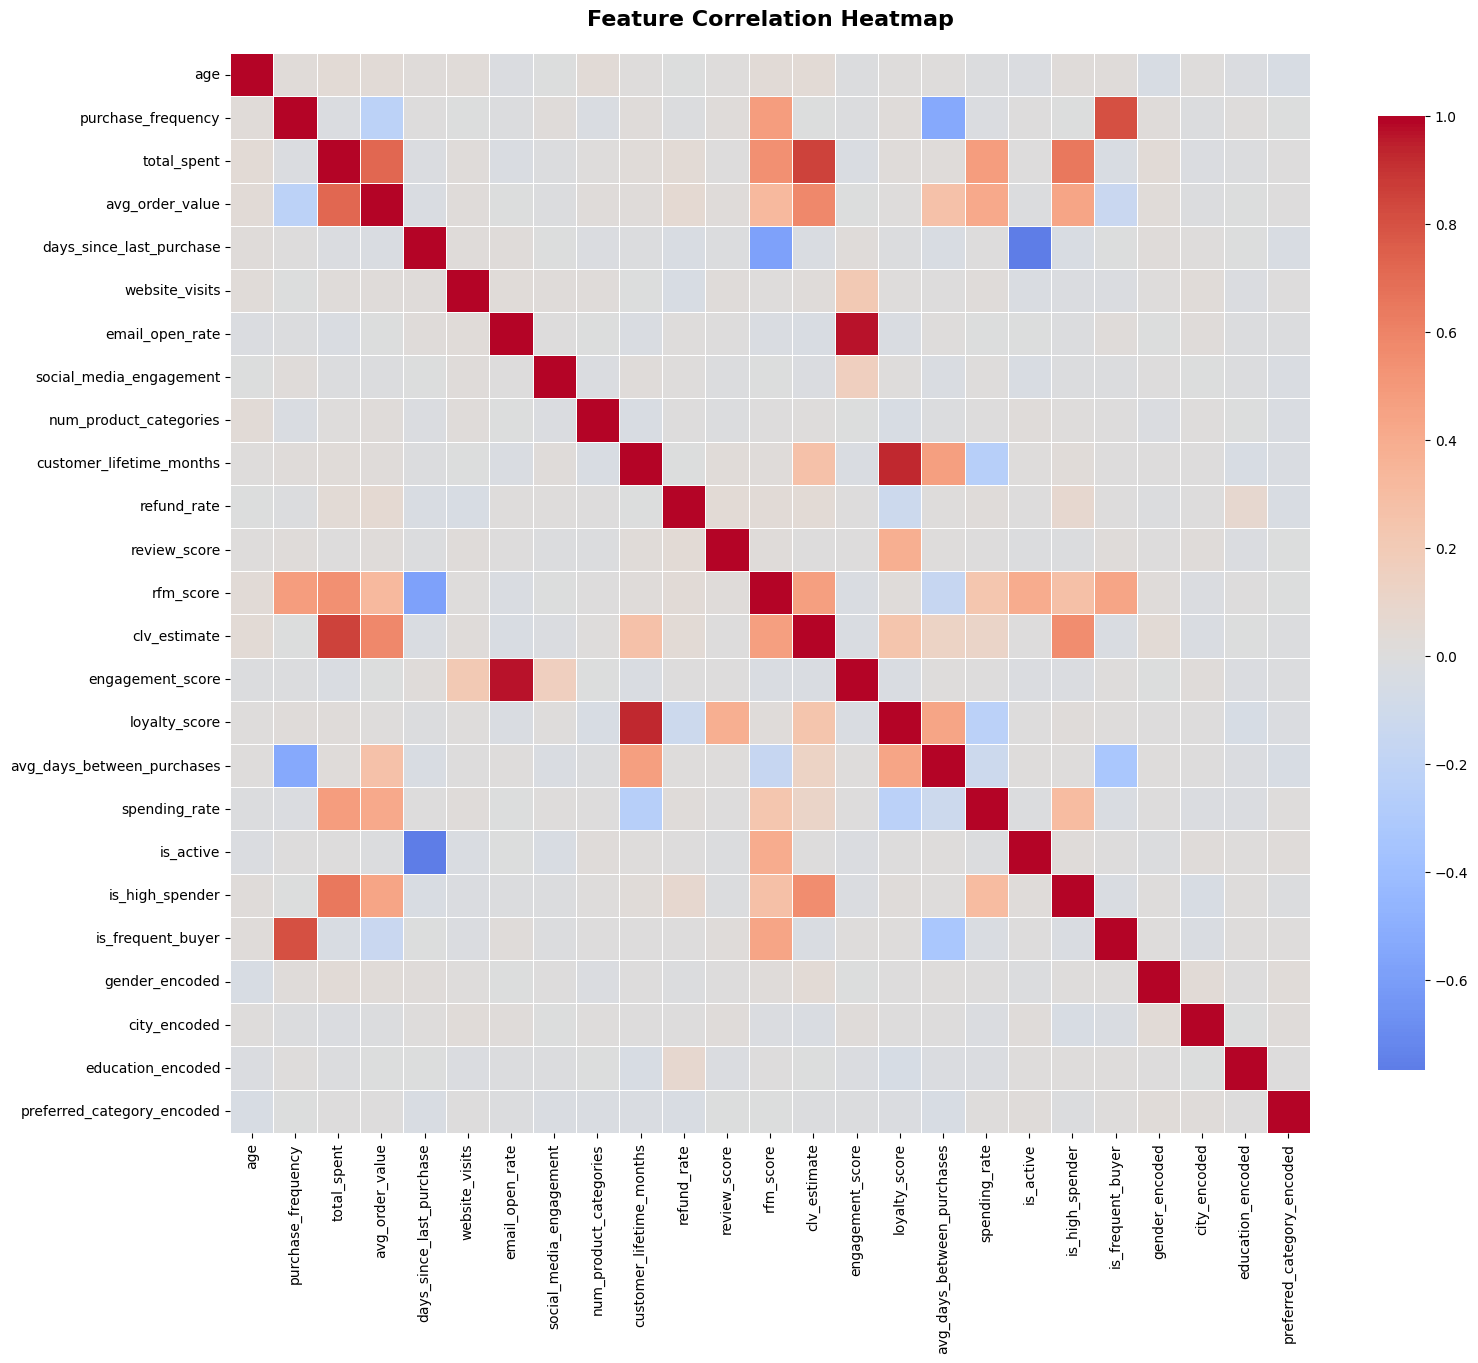

In [6]:

def encode_and_scale(df):
    """
    Encode categorical và scale numeric features
    """

    print("\n" + "=" * 70)
    print("🔄 Bước 4: Encoding và Scaling")
    print("=" * 70)

    df_processed = df.copy()

    # Lưu customer_id
    customer_ids = df_processed['customer_id'].values
    df_processed = df_processed.drop('customer_id', axis=1)

    # Encode categorical features
    categorical_cols = ['gender', 'city', 'education', 'preferred_category']
    label_encoders = {}

    print("🏷️ Encoding categorical features...")
    for col in categorical_cols:
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        df_processed = df_processed.drop(col, axis=1)


    # Select features for clustering
    feature_cols = [col for col in df_processed.columns if col not in 
                    ['recency_score', 'frequency_score', 'monetary_score']]
    
    X = df_processed[feature_cols].values


    # Scale features
    print("📏 Scaling numeric features...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    # Correlation heatmap
    print("\n📊 Tạo correlation heatmap...")
    corr_matrix = pd.DataFrame(X_scaled, columns=feature_cols).corr()

    plt.figure(figsize=(16, 14))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('03_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    print("✅ Đã lưu: 03_correlation_heatmap.png")


    return X_scaled, feature_cols, scaler, label_encoders, customer_ids

    

X_scaled, feature_cols, scaler, label_encoders, customer_ids = encode_and_scale(data_processed)


🎯 Bước 5: Tìm số cluster tối ưu
🔄 Đang tính toán metrics cho các số cluster khác nhau...
  K=2: Silhouette=0.141, DB Index=2.838
  K=3: Silhouette=0.123, DB Index=2.161
  K=4: Silhouette=0.092, DB Index=2.469
  K=5: Silhouette=0.085, DB Index=2.362
  K=6: Silhouette=0.078, DB Index=2.318
  K=7: Silhouette=0.071, DB Index=2.250
  K=8: Silhouette=0.068, DB Index=2.130

✅ Đã lưu: 04_cluster_optimization.png

🎯 Số cluster tối ưu đề xuất: 2
   Silhouette Score: 0.141


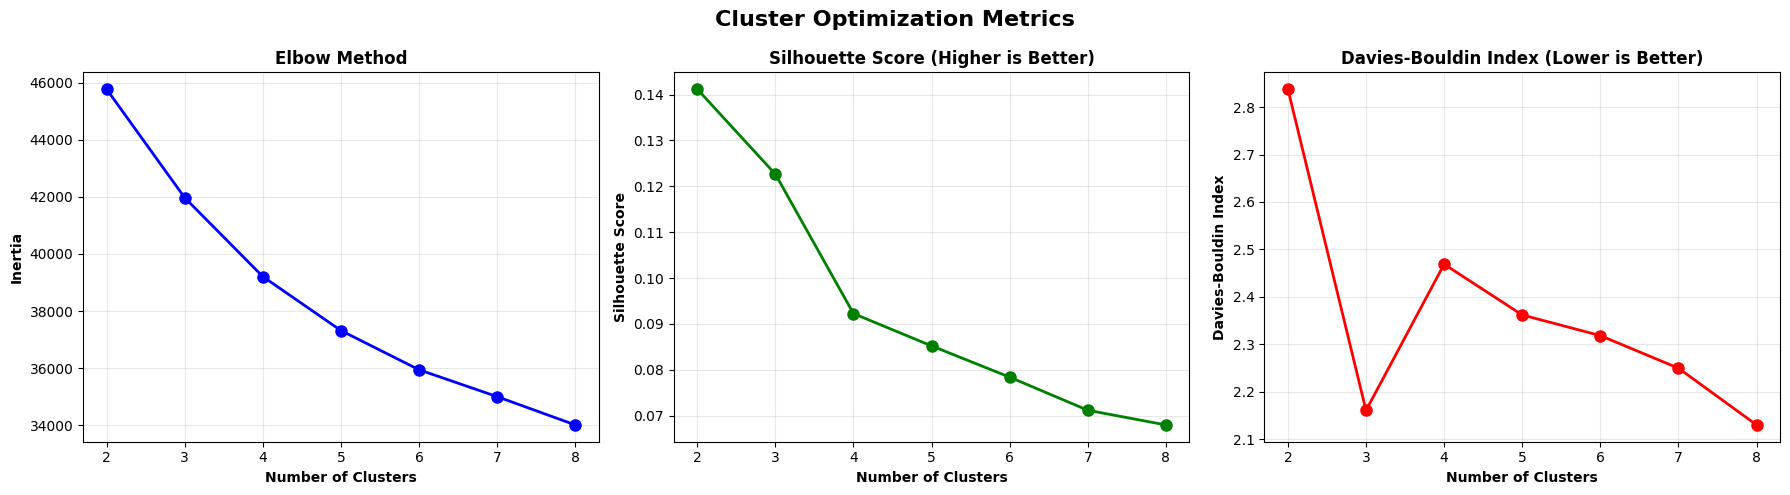

In [7]:
def find_optimal_clusters(X, max_clusters=10):
    """
    Tìm số cluster tối ưu bằng Elbow Method và Silhouette Score
    """

    print("\n" + "=" * 70)
    print("🎯 Bước 5: Tìm số cluster tối ưu")
    print("=" * 70)

    inertias = []
    silhouette_scores = []
    davies_bouldin_scores = []
    cluster_range = range(2, max_clusters + 1)

    print("🔄 Đang tính toán metrics cho các số cluster khác nhau...")
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)

        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))
        davies_bouldin_scores.append(davies_bouldin_score(X, labels))

        print(f"  K={k}: Silhouette={silhouette_scores[-1]:.3f}, DB Index={davies_bouldin_scores[-1]:.3f}")


    # Plot metrics
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Cluster Optimization Metrics', fontsize=16, fontweight='bold')

    # Elbow plot
    axes[0].plot(cluster_range, inertias, 'bo-', linewidth=2, markersize=8)
    axes[0].set_xlabel('Number of Clusters', fontweight='bold')
    axes[0].set_ylabel('Inertia', fontweight='bold')
    axes[0].set_title('Elbow Method', fontweight='bold')
    axes[0].grid(True, alpha=0.3)

    # Silhouette plot
    axes[1].plot(cluster_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
    axes[1].set_xlabel('Number of Clusters', fontweight='bold')
    axes[1].set_ylabel('Silhouette Score', fontweight='bold')
    axes[1].set_title('Silhouette Score (Higher is Better)', fontweight='bold')
    axes[1].grid(True, alpha=0.3)

    # Davies-Bouldin plot
    axes[2].plot(cluster_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
    axes[2].set_xlabel('Number of Clusters', fontweight='bold')
    axes[2].set_ylabel('Davies-Bouldin Index', fontweight='bold')
    axes[2].set_title('Davies-Bouldin Index (Lower is Better)', fontweight='bold')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('04_cluster_optimization.png', dpi=300, bbox_inches='tight')
    print("\n✅ Đã lưu: 04_cluster_optimization.png")

    # Chọn optimal k
    optimal_k = cluster_range[np.argmax(silhouette_scores)]
    print(f"\n🎯 Số cluster tối ưu đề xuất: {optimal_k}")
    print(f"   Silhouette Score: {max(silhouette_scores):.3f}")

    return optimal_k

optimal_k = find_optimal_clusters(X_scaled, max_clusters=8)

In [8]:
def train_clustering_model(X, n_clusters=5):
    """
    Train mô hình clustering
    """

    print("\n" + "=" * 70)
    print(f"🤖 Bước 6: Training Clustering Model (K={n_clusters})")
    print("=" * 70)


    # KMeans
    print("📍 Training KMeans...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20, max_iter=500)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_score = silhouette_score(X, kmeans_labels)


    # Gaussian Mixture
    print("📍 Training Gaussian Mixture Model...")
    gmm = GaussianMixture(n_components=n_clusters, random_state=42, n_init=10)
    gmm_labels = gmm.fit_predict(X)
    gmm_score = silhouette_score(X, gmm_labels)


    print(f"\n📊 Kết quả:")
    print(f"   KMeans Silhouette Score: {kmeans_score:.3f}")
    print(f"   GMM Silhouette Score: {gmm_score:.3f}")


    # Chọn model tốt hơn
    if kmeans_score >= gmm_score:
        print(f"\n✅ Chọn KMeans (score cao hơn)")
        final_model = kmeans
        final_labels = kmeans_labels
    else:
        print(f"\n✅ Chọn Gaussian Mixture (score cao hơn)")
        final_model = gmm
        final_labels = gmm_labels

    return final_model, final_labels


n_clusters = optimal_k  # Hoặc set manual: n_clusters = 5
clustering_model, labels = train_clustering_model(X_scaled, n_clusters=n_clusters)


🤖 Bước 6: Training Clustering Model (K=2)
📍 Training KMeans...
📍 Training Gaussian Mixture Model...

📊 Kết quả:
   KMeans Silhouette Score: 0.141
   GMM Silhouette Score: 0.140

✅ Chọn KMeans (score cao hơn)



🎨 Bước 7: Visualization Clusters (PCA)
📉 Giảm chiều dữ liệu bằng PCA...
   Variance explained: 14.02% + 10.73% = 24.75%
✅ Đã lưu: 05_clusters_pca.png

🎨 Bước 7: Visualization Clusters (TSNE)
📉 Giảm chiều dữ liệu bằng t-SNE...
✅ Đã lưu: 05_clusters_tsne.png


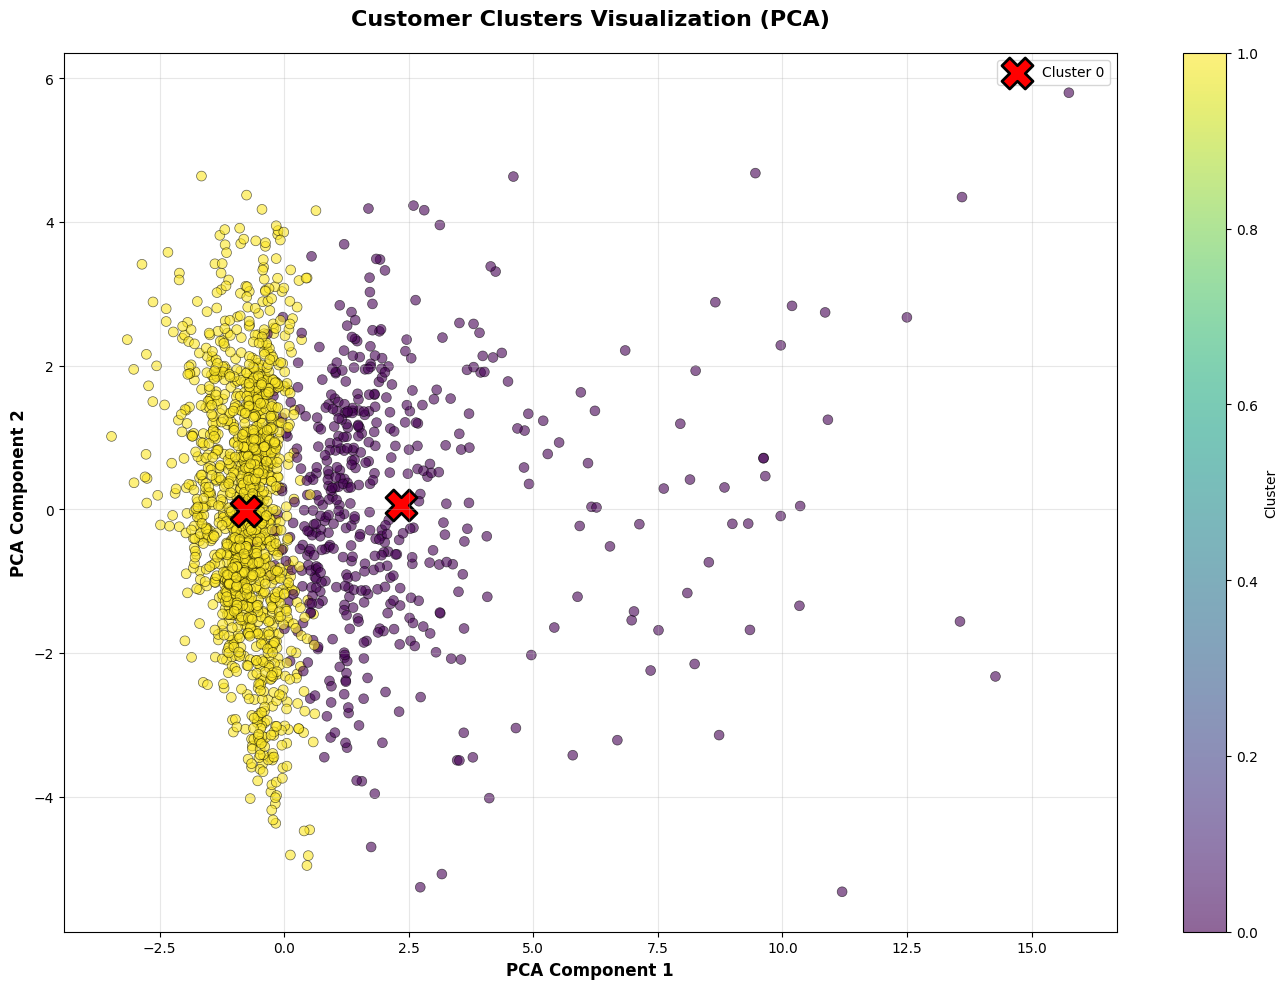

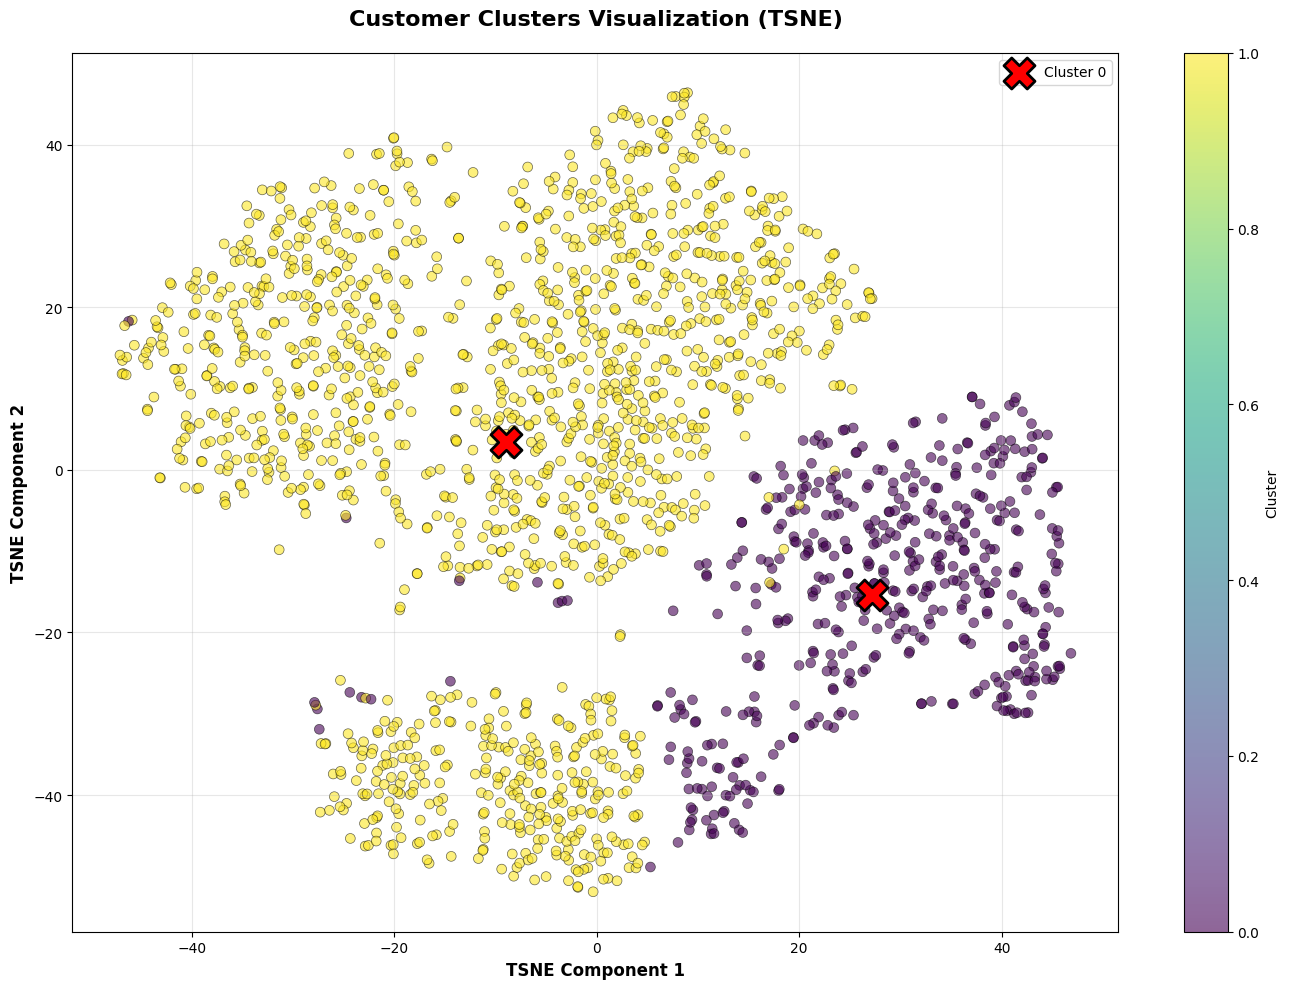

In [9]:
def visualize_clusters(X, labels, method='pca'):
    """
    Visualize clusters trong 2D space
    """

    print("\n" + "=" * 70)
    print(f"🎨 Bước 7: Visualization Clusters ({method.upper()})")
    print("=" * 70)

    if method == 'pca':
        print("📉 Giảm chiều dữ liệu bằng PCA...")
        reducer = PCA(n_components=2, random_state=42)
        X_reduced = reducer.fit_transform(X)
        variance_explained = reducer.explained_variance_ratio_
        print(f"   Variance explained: {variance_explained[0]:.2%} + {variance_explained[1]:.2%} = {sum(variance_explained):.2%}")
    else:
        print("📉 Giảm chiều dữ liệu bằng t-SNE...")
        reducer = TSNE(n_components=2, random_state=42, perplexity=30)
        X_reduced = reducer.fit_transform(X)


    # Plot
    plt.figure(figsize=(14, 10))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
                         c=labels, cmap='viridis', 
                         s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
    
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel(f'{method.upper()} Component 1', fontweight='bold', fontsize=12)
    plt.ylabel(f'{method.upper()} Component 2', fontweight='bold', fontsize=12)
    plt.title(f'Customer Clusters Visualization ({method.upper()})', 
              fontweight='bold', fontsize=16, pad=20)
    plt.grid(True, alpha=0.3)


    # Thêm cluster centers
    for i in range(len(np.unique(labels))):
        cluster_center = X_reduced[labels == i].mean(axis=0)
        plt.scatter(cluster_center[0], cluster_center[1], 
                   marker='X', s=500, c='red', edgecolors='black', linewidth=2,
                   label=f'Cluster {i}' if i == 0 else '')
        
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.savefig(f'05_clusters_{method}.png', dpi=300, bbox_inches='tight')
    print(f"✅ Đã lưu: 05_clusters_{method}.png")



visualize_clusters(X_scaled, labels, method='pca')
visualize_clusters(X_scaled, labels, method='tsne')


📋 Bước 8: Phân tích Customer Personas

📊 CUSTOMER PERSONA SUMMARY
       Persona  Size Percentage Avg Age Avg Spending Avg Frequency Avg CLV Loyalty Score Days Since Purchase
⭐ Big Spenders   489      24.4%      41      $24,907           5.5 $66,950          68.8                  27
   👥 Cluster 1  1511      75.5%      40       $2,508           5.6  $6,367          67.9                  31

📝 PERSONA DESCRIPTIONS

⭐ Big Spenders
  → Chi tiêu cao nhưng loyalty trung bình, cần chăm sóc

👥 Cluster 1
  → Nhóm khách hàng trung bình


/var/folders/8s/5p551ggs4fb2kjgvk5kzysnr0000gn/T/ipykernel_69760/4135690242.py:117: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/8s/5p551ggs4fb2kjgvk5kzysnr0000gn/T/ipykernel_69760/4135690242.py:117: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/8s/5p551ggs4fb2kjgvk5kzysnr0000gn/T/ipykernel_69760/4135690242.py:118: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig('06_persona_characteristics.png', dpi=300, bbox_inches='tight')
/var/folders/8s/5p551ggs4fb2kjgvk5kzysnr0000gn/T/ipykernel_69760/4135690242.py:118: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.savefig('06_persona_characteristics.png', dpi=300, bbox_inches='tight')



✅ Đã lưu: 06_persona_characteristics.png


/Volumes/MacDrive_Ex/Code/machine learning/machine_learning_practice/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Volumes/MacDrive_Ex/Code/machine learning/machine_learning_practice/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


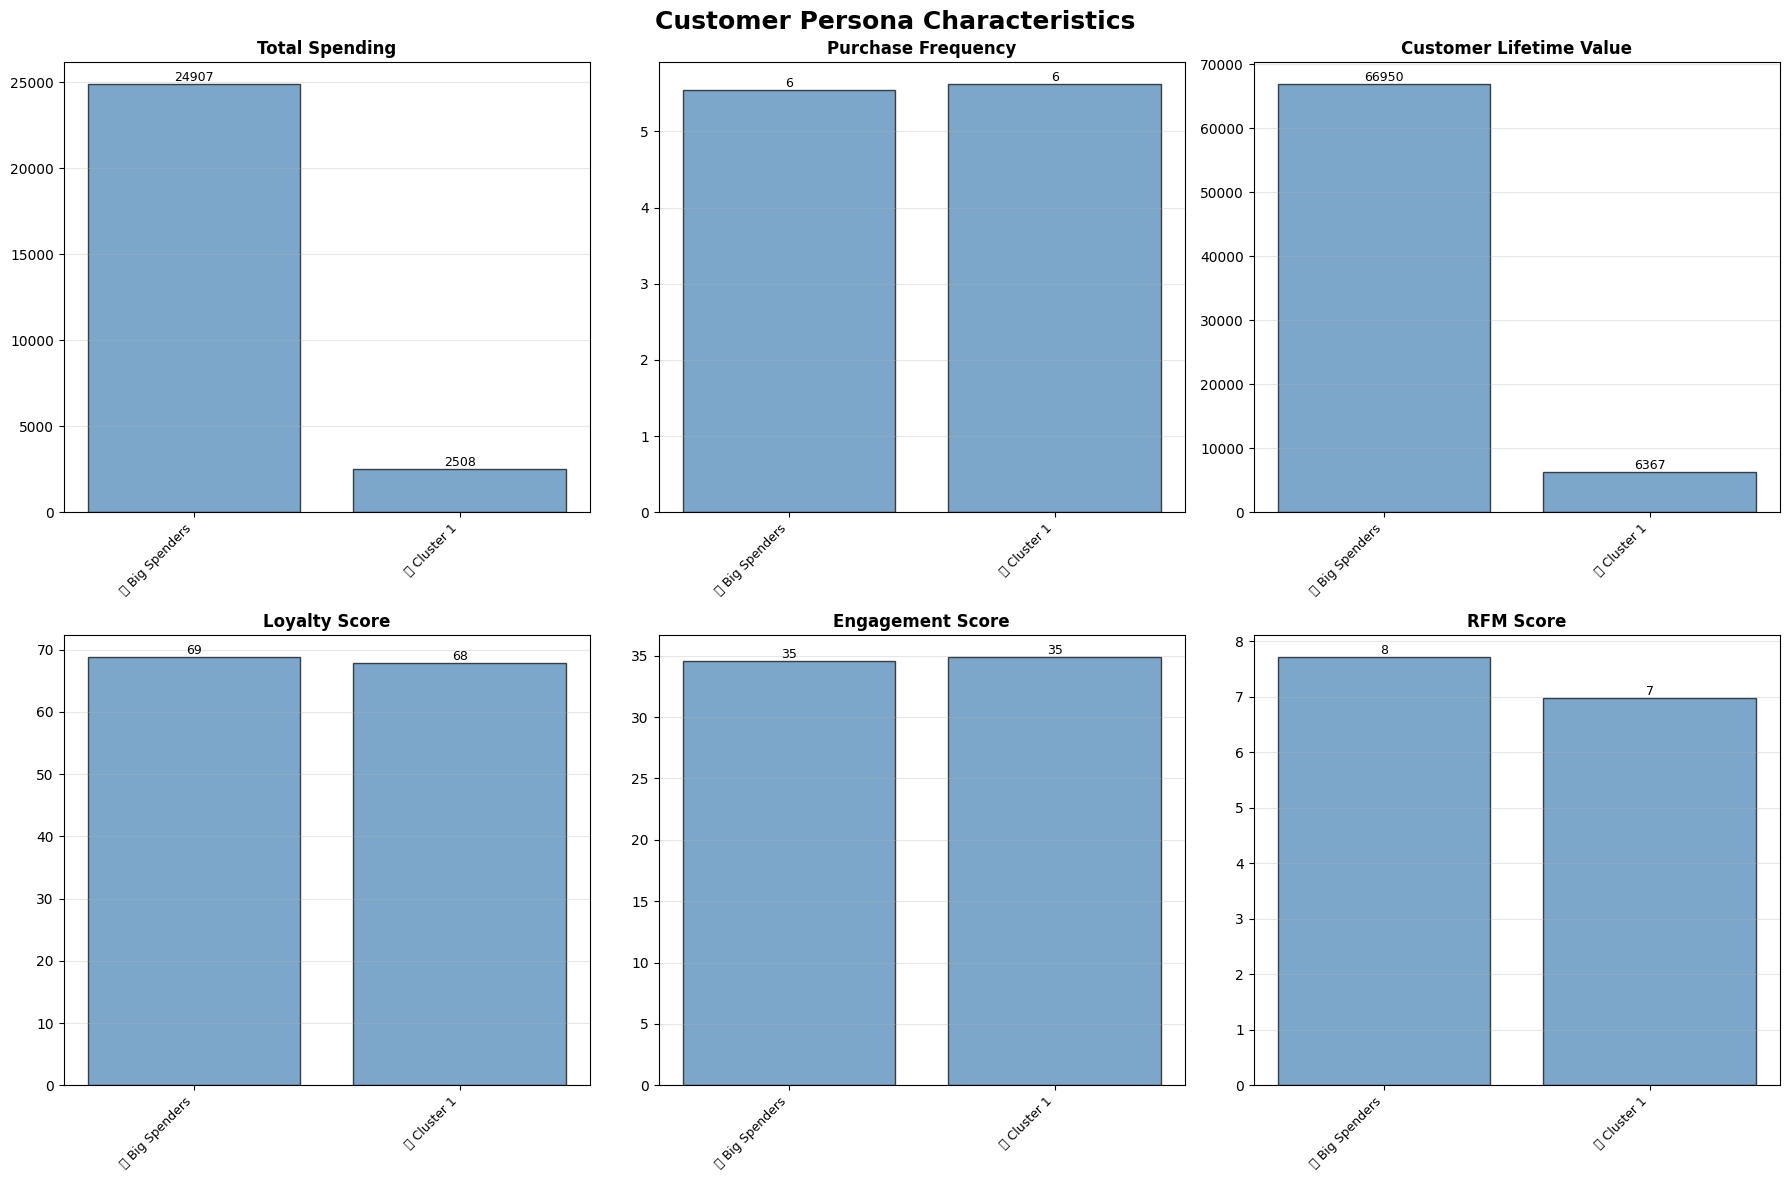

In [10]:

def analyze_personas(df_original, labels, feature_cols):
    """
    Phân tích và mô tả từng customer persona
    """

    print("\n" + "=" * 70)
    print("📋 Bước 8: Phân tích Customer Personas")
    print("=" * 70)

    df_analysis = df_original.copy()
    df_analysis['Persona'] = labels

    # Định nghĩa persona names dựa trên đặc điểm
    persona_names = {}
    persona_descriptions = {}

    for cluster_id in range(len(np.unique(labels))):
        cluster_data = df_analysis[df_analysis['Persona'] == cluster_id]

        # Phân tích đặc điểm
        avg_spending = cluster_data['total_spent'].mean()
        avg_frequency = cluster_data['purchase_frequency'].mean()
        avg_clv = cluster_data['clv_estimate'].mean()
        avg_loyalty = cluster_data['loyalty_score'].mean()
        avg_recency = cluster_data['days_since_last_purchase'].mean()

        # Đặt tên persona
        if avg_clv > df_analysis['clv_estimate'].quantile(0.75):
            if avg_loyalty > df_analysis['loyalty_score'].quantile(0.75):
                name = "💎 VIP Champions"
                desc = "Khách hàng có giá trị cao nhất, loyal và chi tiêu nhiều"
            else:
                name = "⭐ Big Spenders"
                desc = "Chi tiêu cao nhưng loyalty trung bình, cần chăm sóc"
        elif avg_frequency > df_analysis['purchase_frequency'].quantile(0.75):
            name = "🔄 Frequent Buyers"
            desc = "Mua hàng thường xuyên với giá trị trung bình"
        elif avg_recency < 30:
            name = "🆕 Recent Engagers"
            desc = "Mới tương tác gần đây, tiềm năng phát triển"
        elif avg_spending < df_analysis['total_spent'].quantile(0.25):
            name = "💰 Budget Conscious"
            desc = "Nhóm tiết kiệm, nhạy cảm về giá"
        else:
            name = f"👥 Cluster {cluster_id}"
            desc = "Nhóm khách hàng trung bình"


        persona_names[cluster_id] = name
        persona_descriptions[cluster_id] = desc

    # In bảng tổng hợp
    print("\n" + "="*100)
    print("📊 CUSTOMER PERSONA SUMMARY")
    print("="*100)


    summary_data = []
    for cluster_id in sorted(np.unique(labels)):
        cluster_data = df_analysis[df_analysis['Persona'] == cluster_id]

        summary = {
            'Persona': persona_names[cluster_id],
            'Size': len(cluster_data),
            'Percentage': f"{len(cluster_data)/len(df_analysis)*100:.1f}%",
            'Avg Age': f"{cluster_data['age'].mean():.0f}",
            'Avg Spending': f"${cluster_data['total_spent'].mean():,.0f}",
            'Avg Frequency': f"{cluster_data['purchase_frequency'].mean():.1f}",
            'Avg CLV': f"${cluster_data['clv_estimate'].mean():,.0f}",
            'Loyalty Score': f"{cluster_data['loyalty_score'].mean():.1f}",
            'Days Since Purchase': f"{cluster_data['days_since_last_purchase'].mean():.0f}",
        }

        summary_data.append(summary)


    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))

    print("\n" + "="*100)
    print("📝 PERSONA DESCRIPTIONS")
    print("="*100)
    for cluster_id, name in persona_names.items():
        print(f"\n{name}")
        print(f"  → {persona_descriptions[cluster_id]}")

    
    # Visualization - Persona characteristics
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Customer Persona Characteristics', fontsize=18, fontweight='bold')

    metrics = ['total_spent', 'purchase_frequency', 'clv_estimate', 
               'loyalty_score', 'engagement_score', 'rfm_score']
    titles = ['Total Spending', 'Purchase Frequency', 'Customer Lifetime Value',
              'Loyalty Score', 'Engagement Score', 'RFM Score']
    
    for idx, (metric, title) in enumerate(zip(metrics, titles)):
        ax = axes[idx // 3, idx % 3]

        persona_labels = [persona_names[i] for i in sorted(np.unique(labels))]
        values = [df_analysis[df_analysis['Persona'] == i][metric].mean() 
                 for i in sorted(np.unique(labels))]
        
        bars = ax.bar(range(len(values)), values, color='steelblue', edgecolor='black', alpha=0.7)
        ax.set_xticks(range(len(values)))
        ax.set_xticklabels(persona_labels, rotation=45, ha='right', fontsize=9)
        ax.set_title(title, fontweight='bold', fontsize=12)
        ax.grid(True, alpha=0.3, axis='y')

        # Thêm giá trị trên mỗi cột
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.0f}', ha='center', va='bottom', fontsize=9)
            
    
    plt.tight_layout()
    plt.savefig('06_persona_characteristics.png', dpi=300, bbox_inches='tight')
    print("\n✅ Đã lưu: 06_persona_characteristics.png")

    return persona_names, persona_descriptions, summary_df



persona_names, persona_descriptions, summary_df = analyze_personas(
    data_processed, labels, feature_cols
)


🎓 Bước 9: Training Supervised Classifier
🌲 Training Random Forest Classifier...

📊 Kết quả:
   Training Accuracy: 1.000
   Test Accuracy: 0.998
   Cross-Validation Score: 0.994 (+/- 0.004)

✅ Đã lưu: 07_feature_importance.png


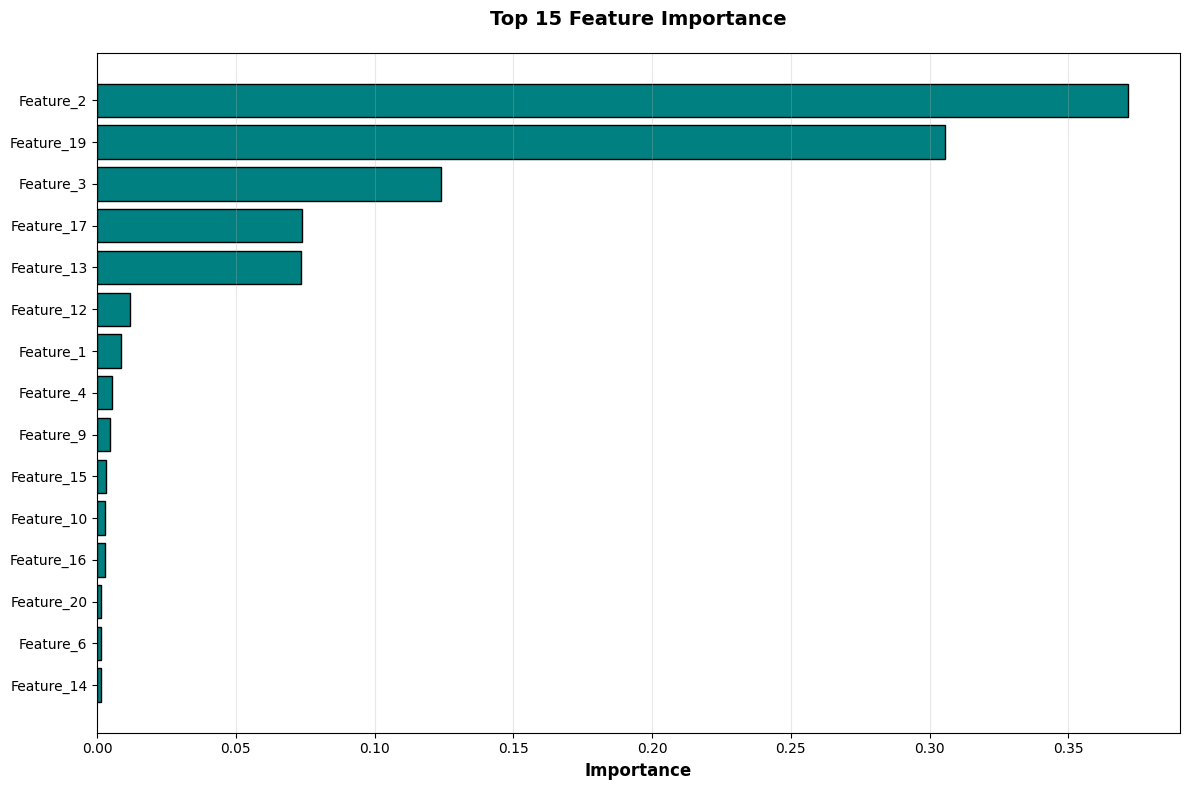

In [ ]:
def train_supervised_classifier(X, labels):
    """
    Train supervised model để dự đoán persona
    """
    print("\n" + "=" * 70)
    print("🎓 Bước 9: Training Supervised Classifier")
    print("=" * 70)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, labels, test_size=0.2, random_state=42, stratify=labels
    )
    
    # Train Random Forest
    print("🌲 Training Random Forest Classifier...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    
    # Evaluate
    train_score = rf_model.score(X_train, y_train)
    test_score = rf_model.score(X_test, y_test)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
    
    print(f"\n📊 Kết quả:")
    print(f"   Training Accuracy: {train_score:.3f}")
    print(f"   Test Accuracy: {test_score:.3f}")
    print(f"   Cross-Validation Score: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': [f'Feature_{i}' for i in range(X.shape[1])],
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False).head(15)
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(feature_importance)), feature_importance['importance'], color='teal', edgecolor='black')
    plt.yticks(range(len(feature_importance)), feature_importance['feature'])
    plt.xlabel('Importance', fontweight='bold', fontsize=12)
    plt.title('Top 15 Feature Importance', fontweight='bold', fontsize=14, pad=20)
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('07_feature_importance.png', dpi=300, bbox_inches='tight')
    print("\n✅ Đã lưu: 07_feature_importance.png")
    
    return rf_model


rf_model = train_supervised_classifier(X_scaled, labels)

In [14]:
def save_models(
    clustering_model,
    scaler,
    label_encoders,
    rf_model=None,
    persona_names=None,
    feature_cols=None
):
    """
    Lưu các models và preprocessing objects
    """

    print("\n" + "=" * 70)
    print("💾 Bước 10: Lưu Models và Artifacts")
    print("=" * 70)

    # Tạo model package
    model_package = {
        'clustering_model': clustering_model,
        'scaler': scaler,
        'label_encoders': label_encoders,
        'rf_model': rf_model,
        'persona_names': persona_names,
        'feature_cols': feature_cols
    }

    # Lưu model
    joblib.dump(model_package, 'customer_persona_model.pkl')
    print("✅ Đã lưu model package: customer_persona_model.pkl")

    # Lưu riêng từng component
    joblib.dump(clustering_model, 'clustering_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(label_encoders, 'label_encoders.pkl')

    if rf_model is not None:
        joblib.dump(rf_model, 'rf_classifier.pkl')
        print("✅ Đã lưu Random Forest classifier")

    print("✅ Đã lưu tất cả model components")
    print(f"📦 Kích thước model package: {os.path.getsize('customer_persona_model.pkl') / 1024:.2f} KB")



save_models(clustering_model, scaler, label_encoders, rf_model, 
                persona_names, feature_cols)
    
print("\n" + "=" * 70)
print("✅ PIPELINE HOÀN TẤT!")
print("=" * 70)
print("\n📁 Files đã tạo:")

files = [
    '01_feature_distributions.png',
    '02_categorical_distributions.png',
    '03_correlation_heatmap.png',
    '04_cluster_optimization.png',
    '05_clusters_pca.png',
    '05_clusters_tsne.png',
    '06_persona_characteristics.png',
    '07_feature_importance.png',
    'customer_persona_model.pkl'
]

for f in files:
    if os.path.exists(f):
        print(f"   ✓ {f}")

# Lưu summary report
summary_df.to_csv('persona_summary.csv', index=False)
print("   ✓ persona_summary.csv")



💾 Bước 10: Lưu Models và Artifacts
✅ Đã lưu model package: customer_persona_model.pkl
✅ Đã lưu Random Forest classifier
✅ Đã lưu tất cả model components
📦 Kích thước model package: 286.54 KB

✅ PIPELINE HOÀN TẤT!

📁 Files đã tạo:
   ✓ 01_feature_distributions.png
   ✓ 02_categorical_distributions.png
   ✓ 03_correlation_heatmap.png
   ✓ 04_cluster_optimization.png
   ✓ 05_clusters_pca.png
   ✓ 05_clusters_tsne.png
   ✓ 06_persona_characteristics.png
   ✓ 07_feature_importance.png
   ✓ customer_persona_model.pkl
   ✓ persona_summary.csv
